<a href="https://colab.research.google.com/github/yumi-kim/big_data_class/blob/master/%EC%BD%94%EB%94%A97%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd /content/gdrive/My\ Drive/analysis/경상대/2019/8.\ 강의/2019바이오빅데이터/2019바이오빅데이터\ 수업자료/


/content/gdrive/My Drive/analysis/경상대/2019/8. 강의/2019바이오빅데이터/2019바이오빅데이터 수업자료


In [0]:
import pandas as pd
import numpy as np
from collections import Counter

In [0]:
df_food = pd.read_pickle('./gt_food_23accesions.pkl')
df_food.head()

In [0]:
df_food.shape

(413041, 23)

In [0]:
df_food.head()

,SRR7501150,SRR7501160,SRR7501167,SRR7501181,SRR7505765,SRR7505768,SRR7505771,SRR7505773,SRR7505774,SRR7505779,...,SRR7505877,SRR7505879,SRR7505880,SRR7505882,SRR7505889,SRR7505890,SRR7511299,SRR7527615,SRR7834586,SRR7850029
0,CC,CC,AA,AA,AA,CC,CC,AA,CC,CC,...,CC,AA,AA,CC,AA,CC,CC,CC,AA,AA
1,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,...,TT,CC,CC,CC,CC,CC,TT,CC,TT,TT
2,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,...,GG,GG,GG,GG,GG,GG,GG,GG,TT,TT
3,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,...,TT,TT,TT,TT,TT,TT,TT,TT,CC,CC
4,TT,TT,CC,CC,CC,TT,CC,CC,TT,TT,...,CC,CC,CC,TT,CC,CC,CC,TT,CC,CC


In [0]:
# p^2 + 2pq + q^2 = 1
# fixation index = (He - Ho) / He
# 2pq * number of genotypes
# 가장먼저 fixation index를 구하기 위해서 해야할일
# p 와 q를 구하는것


In [0]:
# df_food.loc[0] # 0번째 locus의 모든 sample에 대한 genotype을 불러옴 
def get_F(gt_pool):
  alleles          = np.array([list(x) for x in gt_pool]).ravel()
  try:
    dic_allele_count = dict(Counter(alleles))
  except TypeError:
    return -99
  dic_allele_frq   = {x:y/(df_food.shape[1]*2) for x,y in dic_allele_count.items()}
  if len(dic_allele_frq.values()) > 1:
    He = np.prod(list(dic_allele_frq.values())) * 2 * df_food.shape[1]
    hetero_gt = ''.join(dic_allele_frq.keys())
    Ho = list(gt_pool).count(hetero_gt) + list(gt_pool).count(hetero_gt[::-1])
    F = (He - Ho) / He 
    print(He,Ho)
  else:
    He = 0
    Ho = 0
    F = -99
  return F

In [0]:
get_F(df_food.loc[0])

1.0

In [0]:
get_F(df_food.loc[999])

0.6434108527131783

In [0]:
from tqdm import tqdm_notebook

In [0]:
Fs = [] 
for ix in tqdm_notebook(df_food.index):
  gt_pool = df_food.loc[ix]
  F = get_F(gt_pool)
  Fs.append(F)

In [0]:
df_food['F'] = Fs

(0, 1)

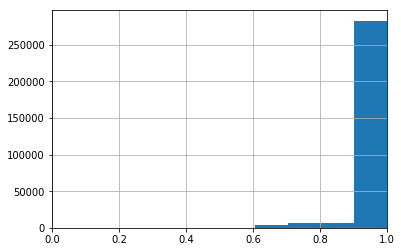

In [0]:
import matplotlib.pyplot as plt
import seaborn as sb
m = df_food['F'] >= 0  # F값이 0 보다 같거나 큰 locus만 가지고 오기 위해 만든 
                       # masking 변수 
                       # masking이란 
                       # True or False로 이루어져 있는 변수 

df_food[m]['F'].hist() # m 이 True인 자리만 가져오게됨 
plt.xlim(0,1)

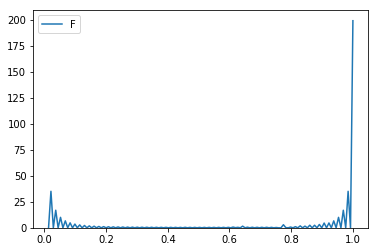

In [0]:
sb.kdeplot(df_food[m]['F'])

In [0]:
m1 = df_food['F'] > 0 
m2 = df_food['F'] < 0.2
df_food[m1&m2].to_excel('hetero_expected.xlsx')

In [0]:
# consanguineous mating (근친혼)
# 식물의 selfing 

In [0]:
# hardy weinberg equilibrium 
# xx번째 가정 : 동일한 수의 자손을 낳는다.

def get_offsprings(gt,n_off):
  gt = list(gt)
  allele1 = np.random.choice(gt,size=n_off)
  allele2 = np.random.choice(gt,size=n_off)
  offsprings = [''.join(np.sort(np.array(x))) for x in [*zip(allele1,allele2)]]
  return offsprings

In [0]:
def get_F(gt_pool):
  alleles          = np.array([list(x) for x in gt_pool]).ravel()
  try:
    dic_allele_count = dict(Counter(alleles))
  except TypeError:
    return -99
  dic_allele_frq   = {x:y/(len(gt_pool)*2) for x,y in dic_allele_count.items()}
  if len(dic_allele_frq.values()) > 1:
    He = np.prod(list(dic_allele_frq.values())) * 2 * len(gt_pool)
    hetero_gt = ''.join(dic_allele_frq.keys())
    Ho = list(gt_pool).count(hetero_gt) + list(gt_pool).count(hetero_gt[::-1])
    F = (He - Ho) / He 
    #print(He,Ho)
  else:
    He = 0
    Ho = 0
    F = -99
  return F

In [0]:
gt_pool = ['AA'] * 5 + ['Aa'] * 10 + ['aa'] * 5 

In [0]:
Fs = [get_F(gt_pool)]
for g in range(8):
  gt_pool_next = []
  for gt in tqdm_notebook(gt_pool):
    offsprings = get_offsprings(gt,5)
    gt_pool_next += offsprings
  gt_pool = gt_pool_next
  F = get_F(gt_pool)
  Fs.append(F)

Text(0, 0.5, 'Fixation index')

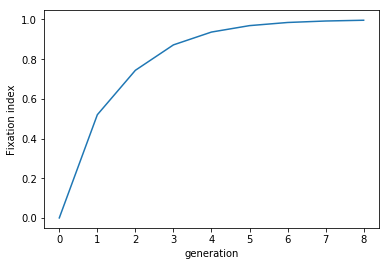

In [0]:
plt.plot(range(9),Fs)
plt.xlabel('generation')
plt.ylabel('Fixation index')